In [1]:
import numpy as np
import pandas as pd
import sympy as sm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib_inline.backend_inline import set_matplotlib_formats
plt.style.use('seaborn-v0_8')
plt.rcParams |= {
    'text.usetex': True,
    'figure.figsize': (10, 4)
}
set_matplotlib_formats('svg', 'pdf')

In [2]:
df = pd.read_csv('/Users/ammar-imac/Downloads/NMR/tek0006ALL.csv')
df2 = pd.read_csv('/Users/ammar-imac/Downloads/NMR/tek0007ALL.csv')
df3 = pd.read_csv('/Users/ammar-imac/Downloads/NMR/tek0008ALLLLLLL.csv')

In [3]:
df = df[19:]
df.columns = ['TIME', 'CH1']
df2 = df2[19:]
df2.columns = ['TIME', 'CH1']
df3 = df3[19:]
df3.columns = ['TIME', 'CH1']

In [4]:
df

,TIME,CH1
19,5.2000e-05,3.93102
20,5.2400e-05,3.978
21,5.2800e-05,3.9312
22,5.3200e-05,4.0248
23,5.3600e-05,4.02462
...,...,...
10014,4.0500e-03,0.0468
10015,4.0504e-03,0
10016,4.0508e-03,0.0934172
10017,4.0512e-03,0.0936


In [5]:
def smooth_data(data, window_size):
    return data.rolling(window=window_size, min_periods=1).mean()

# Function for the decay exponential
def decay_func(t, A, k, C):
    return A * np.exp(-k * t) + C

def decay_func_sm(t, A, k, C):
    return A * sm.exp(-k * t) + C

In [ ]:
t = df3.TIME.iloc[val:].astype(float)
y = smooth_data(df3.CH1.iloc[val:], 50).astype(float)
# Fit the data to the decay function using curve_fit
params, covariance = curve_fit(decay_func, t, y)

# Extract the fitted parameters
A_fit, k_fit, C_fit = params

In [ ]:
t = sm.symbols('t')
decay_func_sm(t, A_fit, k_fit, C_fit)

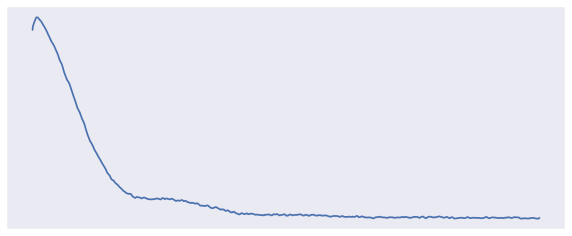

In [6]:
plt.plot(df.TIME, smooth_data(df.CH1, 50))
plt.xticks([])
plt.yticks([])  
plt.show()

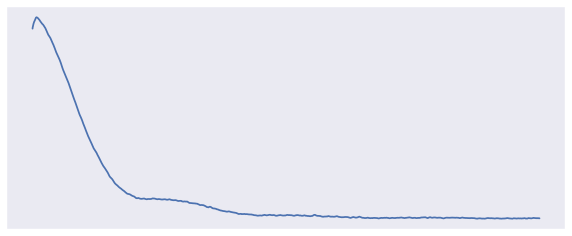

In [7]:
plt.plot(df2.TIME, smooth_data(df2.CH1, 50))
plt.xticks([])
plt.yticks([])  
plt.show()

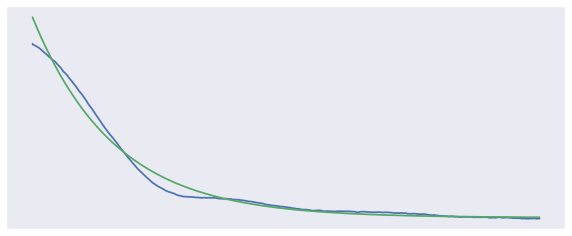

In [15]:
val = np.argmax(df3.CH1)
plt.plot(df3.TIME.iloc[val:], smooth_data(df3.CH1.iloc[val:], 50))
plt.plot(
    df3.TIME.iloc[val:], decay_func(df3.TIME.iloc[val:].astype(float), *params)
)

plt.xticks([])
plt.yticks([])  
plt.show()